In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime, date
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Our dataset is a set of issues of a newspaper called *The Liberator* <https://en.wikipedia.org/wiki/The_Liberator_(newspaper)>, which was active for the last few decades of the abolitionist period.

In [2]:
! tar xvzf TheLiberator.tgz

x TheLiberator/
x TheLiberator/1848-09-01.txt
x TheLiberator/1850-11-01.txt
x TheLiberator/1840-05-01.txt
x TheLiberator/1839-11-01.txt
x TheLiberator/1844-11-01.txt
x TheLiberator/1838-06-01.txt
x TheLiberator/1860-06-01.txt
x TheLiberator/1834-03-01.txt
x TheLiberator/1841-01-01.txt
x TheLiberator/1857-05-01.txt
x TheLiberator/1847-01-01.txt
x TheLiberator/1832-12-01.txt
x TheLiberator/1861-03-01.txt
x TheLiberator/1864-01-01.txt
x TheLiberator/1851-11-01.txt
x TheLiberator/1851-08-01.txt
x TheLiberator/1861-02-01.txt
x TheLiberator/1833-06-01.txt
x TheLiberator/1854-09-01.txt
x TheLiberator/1831-01-01.txt
x TheLiberator/1850-03-01.txt
x TheLiberator/1843-12-01.txt
x TheLiberator/1849-06-01.txt
x TheLiberator/1836-10-01.txt
x TheLiberator/1861-11-01.txt
x TheLiberator/1834-02-01.txt
x TheLiberator/1850-02-01.txt
x TheLiberator/1863-05-01.txt
x TheLiberator/1856-08-01.txt
x TheLiberator/1864-04-01.txt
x TheLiberator/1842-04-01.txt
x TheLiberator/1865-12-01.txt
x TheLiberator/1844-03-0

In [3]:
#files = sorted(glob('TheLily/*'))
files = sorted(glob('TheLiberator/*'))

In [4]:
files[-3:]
#QUESTION: last three files?

['TheLiberator/1864-07-01.txt',
 'TheLiberator/1865-09-01.txt',
 'TheLiberator/1865-12-01.txt']

Let's build a vectorizer to read it in. 

Note the flag `binary`. If we set `binary=True`, this would mean that each word is counted at most once per document.

In [16]:
vect = CountVectorizer(input='filename',min_df=10,binary=False)
#QUESTION: binary means we're coding whether a word appears, as yes or no. 
#If binary is false, then we have a word count. 

In [17]:
X = vect.fit_transform(files)
#this turns the text into a matrix representation that we can analyze

In [19]:
X.shape

(59, 8305)

**Your turn**: build another vectorizer, which includes all words that appear in at least 20 documents

In [21]:
vect2 = CountVectorizer(input='filename',min_df=20,max_df=0.75)
X2 = vect2.fit_transform(files)
X2.shape
#QUESTION: what does .75 do here?

(59, 3153)

Let's print the most common words in 1851. To do this, we'll import `dateutil.parser`, which can parse the dates from the filenames.

In [22]:
from dateutil.parser import parse

In [23]:
files[4]

'TheLiberator/1833-06-01.txt'

In [24]:
os.path.basename(files[4])

'1833-06-01.txt'

In [25]:
os.path.basename(files[4])[:-4]

'1833-06-01'

In [26]:
parse(os.path.basename(files[4])[:-4])

datetime.datetime(1833, 6, 1, 0, 0)

In [27]:
# this list comprehension parses each of the dates in the filenames
dates = [parse(os.path.basename(filename)[:-4],'')
         for filename 
         in files]

In [28]:
print(dates[-3:])
print(files[-3:])

[datetime.datetime(1864, 7, 1, 0, 0), datetime.datetime(1865, 9, 1, 0, 0), datetime.datetime(1865, 12, 1, 0, 0)]
['TheLiberator/1864-07-01.txt', 'TheLiberator/1865-09-01.txt', 'TheLiberator/1865-12-01.txt']


Now we want to select a slice of X, corresponding only to editions in 1851.

We'll use the `enumerate` function to find the indices of dates that match the desired condition.

In [29]:
[(i,date) for i,date in enumerate(dates) if date.year==1851]

[(34, datetime.datetime(1851, 8, 1, 0, 0)),
 (35, datetime.datetime(1851, 11, 1, 0, 0))]

In [30]:
X_1851 = X[[i for i,date in enumerate(dates) if date.year==1851],]

In [31]:
X_1851.shape

(2, 8305)

So `X_1851` contains two instances, corresponding to the two editions published in 1851. (Actually, we're working with a small sample of the full dataset, there were several other editions published in that year.)

To find the most common words in this sample, let's construct an inverted index from the columns of `X` back to the vocabulary. 

In [32]:
ivoc = {j:i for i,j in vect.vocabulary_.items()}

In [33]:
np.array(X_1851.sum(axis=0))[0]
#QUESTION: This generates the sum for each column, which corresponds
#to the total number of times each word has occured in 1851 sample. 
#What does axis=0 do here? Axis indicates that we're performing the 
#function across each column if axis = 0. And across each row if axis=1.

array([ 2, 14,  4, ...,  0,  0,  0], dtype=int64)

In [60]:
#just checking!
np.array(X_1851.sum(axis=0))[0,0:20]

array([ 2, 14,  4,  1,  0,  3,  4,  1,  3,  0,  0,  3,  0,  1,  0,  0,  3,
        1,  0,  3], dtype=int64)

In [34]:
[ivoc[i] for i in np.array(X_1851.sum(axis=0))[0].argsort()[::-1][:5]
#QUESTION: what do these correspond to? [::-1][:5]

['the', 'of', 'and', 'to', 'in']

In [ ]:
[ivoc[i] for i in np.array(X_1851.sum(axis=0))[0].argsort()[:5:-1]
 #I did not run this but i think it would work

Not too interesting, but we're just getting started. 

**Your turn** Build a matrix containing the counts for editions published in the 1860s.

In [35]:
X_1860s = X[[i for i,date in enumerate(dates) 
             if (date.year>=1860) and (date.year<1870)],]

In [36]:
# make sure you verify this
X_1860s.shape

(11, 8305)

In [62]:
[ivoc[i] for i in np.array(X_1860s.sum(axis=0))[0].argsort()[::-1][:5]]

['the', 'of', 'and', 'to', 'in']

# Pointwise mutual information

Rather than look at the most common words in each year or set of years, let's look at the words that have high *pointwise mutual information* with the year. This is defined as:

\begin{equation}
PMI(i,j) = \log \frac{P(i,j)}{P(i)\times P(j)} = \log P(i,j) - \log P(i) - \log P(j)
\end{equation}

We'll now introduce code to compute each part of this equation.

In [37]:
# this computes $p(i)$, where $i$ is a word
def get_p_word(X):
    X_tot = np.array(X.sum(axis=0))[0]
    return X_tot / X.sum()

In [66]:
P_base = get_p_word(X)
print(X.sum())
print(P_base[1])

1713305
0.000313429307683


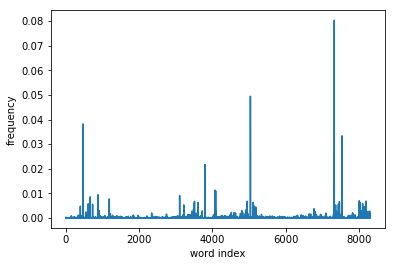

In [67]:
plt.plot(P_base)
plt.xlabel('word index')
plt.ylabel('frequency');

In [40]:
print([ivoc[i] for i in P_base.argsort()[::-1][:5]])
print(sorted(P_base)[::-1][:5])

['the', 'of', 'and', 'to', 'in']
[0.080353468880321952, 0.049455292548612188, 0.038205106504679551, 0.033368839757077697, 0.021727596662590724]


Now let's compute $P(year)$ and $P(word,year)$.

To do this, we'll write a function that returns a sum of word counts for a given year.

In [41]:
all_years = sorted(set([date.year for date in dates]))
print(all_years)

[1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865]


In [42]:
def get_X_year(X,dates,year):
    return np.array(X[[i 
              for i,date 
              in enumerate(dates) 
              if date.year==year],].sum(axis=0))[0]

In [43]:
print(get_X_year(X,dates,1851))
print(X_1851.sum(axis=0))

[ 2 14  4 ...,  0  0  0]
[[ 2 14  4 ...,  0  0  0]]


Now let's create this vector for each year.

In [44]:
X_years = [get_X_year(X,dates,year) for year in all_years]

In [45]:
X_years[:3]

[array([ 0, 21,  3, ...,  2,  0,  0], dtype=int64),
 array([ 2, 11, 12, ...,  2,  3,  1], dtype=int64),
 array([47, 12,  5, ...,  0,  0,  1], dtype=int64)]

This is a list of arrays. We can combine this into a single array:

In [46]:
X_all_years = np.array(X_years)

In [47]:
X_all_years

array([[ 0, 21,  3, ...,  2,  0,  0],
       [ 2, 11, 12, ...,  2,  3,  1],
       [47, 12,  5, ...,  0,  0,  1],
       ..., 
       [ 0,  1, 10, ...,  0,  1,  0],
       [ 1, 20, 13, ...,  5,  2,  5],
       [ 1, 19,  6, ...,  3,  1,  1]], dtype=int64)

In [75]:
P_year = X_all_years.sum(axis=1) / X_all_years.sum()
#we are performing this function across each row. so we have one 
#number per year

In [76]:
P_year

array([ 0.01411366,  0.02101902,  0.00972623,  0.04188513,  0.0143407 ,
        0.01494947,  0.0188828 ,  0.01691759,  0.05252363,  0.01493721,
        0.06889783,  0.06110763,  0.06352518,  0.06204324,  0.03534689,
        0.0140693 ,  0.02768742,  0.02650083,  0.01430919,  0.04323398,
        0.02164997,  0.01436113,  0.03003085,  0.02764773,  0.01518527,
        0.02963687,  0.01519111,  0.02934854,  0.01496873,  0.01472651,
        0.04676459,  0.01539072,  0.01451872,  0.0445951 ,  0.02996723])

In [77]:
P_year.shape

(35,)

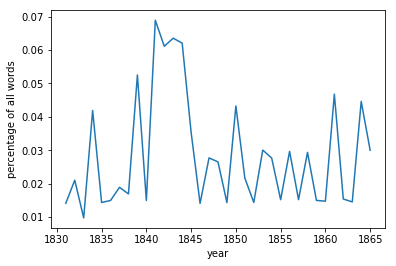

In [78]:
plt.plot(all_years,P_year)
plt.xlabel('year')
plt.ylabel('percentage of all words');
#this plots the verbiage over time

**Optional exercise** Create the same plot for months rather than years.

Now we're ready to compute the PMI.

In [79]:
all_years.index(1851)

20

In [80]:
X_all_years

array([[ 0, 21,  3, ...,  2,  0,  0],
       [ 2, 11, 12, ...,  2,  3,  1],
       [47, 12,  5, ...,  0,  0,  1],
       ..., 
       [ 0,  1, 10, ...,  0,  1,  0],
       [ 1, 20, 13, ...,  5,  2,  5],
       [ 1, 19,  6, ...,  3,  1,  1]], dtype=int64)

In [81]:
idx_1851 = all_years.index(1851)
pmi_1851 = np.log(X_all_years[idx_1851,:]/X_all_years.sum()) - np.log(P_base) - np.log(P_year[idx_1851])

/Users/shawnramirez/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


That divide by zero error comes from taking the logarithm of zero, which will happen for every word that does not appear in the target year. Let's look at the output:

In [82]:
pmi_1851

array([-0.72112563,  0.1858105 , -0.8424113 , ...,        -inf,
              -inf,        -inf])

numpy handles this pretty well, putting a value of `-inf` in the list. 

that means we can go ahead and use argsort to find the highest PMI words.

In [55]:
[ivoc[i] for i in pmi_1851.argsort()[::-1][:5]]

['1851', 'austria', 'fraternity', 'problem', 'theyshould']

The top word is 1851! This is a good sign.

**Your turn** Write a function that takes the year as an argument, and returns the PMI for that year.

In [84]:
def get_pmi_year(X_all_years,P_base,P_year,year):
    # your code here
    idx_year = all_years.index(year)
    return np.log(X_all_years[idx_year,:]/X_all_years.sum()) - np.log(P_base) - np.log(P_year[idx_year])

In [90]:
pmi_year = [get_pmi_year(X_all_years,P_base,P_year,year) for year in all_years]

/Users/shawnramirez/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [101]:
pmi_year[3]

array([-0.46476172, -0.54822429, -0.05541913, ...,  0.27140285,
        0.80570083,  1.06869029])

In [100]:
for year in all_years:
    print(year,[ivoc[i] for i in pmi_year[year].argsort()[::-1][:5]])
#QUESTION: why didn't this work? 

NameError: name 'i' is not defined

In [102]:
for year in all_years:
    print(year,[ivoc[i] for i in get_pmi_year(X_all_years,P_base,P_year,year).argsort()[::-1][:5]])

1831 ['weep', '1831', 'landlord', '1830', 'coach']
1832 ['cup', 'deaths', 'deputy', 'refute', 'cholera']
1833 ['planter', 'isle', 'spectator', '00', 'solomon']
1834 ['overseers', 'chorus', '1834', 'augusta', 'overseer']
1835 ['tracy', 'pull', '1835', 'purvis', 'madam']
1836 ['glasgow', 'opponent', 'kidnapped', 'boasting', 'searched']
1837 ['swallow', 'braintree', '1837', 'clerical', 'deprecate']
1838 ['mob', 'remonstrances', 'kidnappers', 'erected', 'nought']
1839 ['1839', 'harriet', 'disguise', 'marlboro', 'hilton']
1840 ['goodell', 'manifesto', 'harrison', 'follen', 'emancipator']
1841 ['1841', 'pierpont', 'lucretia', 'resistant', 'betrays']
1842 ['1842', 'trains', 'giddings', 'nelson', 'pauper']
1843 ['1843', 'stabbed', 'perkins', 'sham', 'bro']
1844 ['1844', 'birney', 'polk', 'bath', 'bates']
1845 ['writ', 'drunkenness', 'prosecuted', 'insurrections', 'employer']
1846 ['rio', 'drunkard', 'cobb', 'del', 'elegance']
1847 ['campbell', 'edinburgh', 'sand', 'thepoor', 'carved']
1848 ['1

/Users/shawnramirez/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Here's how the output should look.

In [209]:
for year in all_years:
    print(year,[ivoc[i] for i in get_pmi_year(X_all_years,X_base,p_year,year).argsort()[::-1][:5]])

1831 ['weep', '1831', 'landlord', '1830', 'coach']
1832 ['cup', 'deaths', 'deputy', 'refute', 'cholera']
1833 ['planter', 'isle', 'spectator', '00', 'solomon']
1834 ['overseers', 'chorus', '1834', 'augusta', 'overseer']
1835 ['tracy', 'pull', '1835', 'purvis', 'madam']
1836 ['glasgow', 'opponent', 'kidnapped', 'boasting', 'searched']
1837 ['swallow', 'braintree', '1837', 'clerical', 'deprecate']
1838 ['mob', 'remonstrances', 'kidnappers', 'erected', 'nought']
1839 ['1839', 'harriet', 'disguise', 'marlboro', 'hilton']
1840 ['goodell', 'manifesto', 'harrison', 'follen', 'emancipator']
1841 ['1841', 'pierpont', 'lucretia', 'resistant', 'betrays']
1842 ['1842', 'trains', 'giddings', 'nelson', 'pauper']
1843 ['1843', 'stabbed', 'perkins', 'sham', 'bro']
1844 ['1844', 'birney', 'polk', 'bath', 'bates']
1845 ['writ', 'drunkenness', 'prosecuted', 'insurrections', 'employer']
1846 ['rio', 'drunkard', 'cobb', 'del', 'elegance']
1847 ['campbell', 'edinburgh', 'sand', 'thepoor', 'carved']
1848 ['1

/usr/lib/python3/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


These results suggest possibilities for further research: why was "drunkenness" a concern in 1845 and 1846, etc.

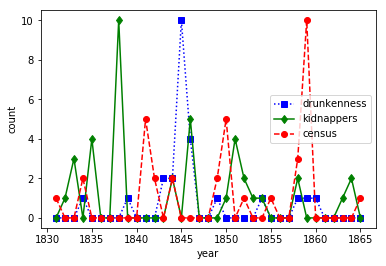

In [59]:
plt.plot(all_years,X_all_years[:,vect.vocabulary_['drunkenness']],'bs:')
plt.plot(all_years,X_all_years[:,vect.vocabulary_['kidnappers']],'gd-')
plt.plot(all_years,X_all_years[:,vect.vocabulary_['census']],'ro--')
plt.legend(['drunkenness','kidnappers','census'])
plt.ylabel('count')
plt.xlabel('year');

**Your turn**. Redo this analysis, using only words that appeared at least 50 times in the dataset.

In [103]:
vect_50 = CountVectorizer(input='filename',min_df=50,binary=False)

In [104]:
# your code here
X50 = vect_50.fit_transform(files)
X50.shape

(59, 1058)

In [105]:
#get the frequency of each word
P_base_50 = get_p_word(X50)

In [110]:
#create the vector of frequencies of each word for each year in the data 
X_years_50 = [get_X_year(X50,dates,year) for year in all_years]

In [111]:
#now combine that into a single array
X_all_years_50 = np.array(X_years_50)

In [112]:
P_year_50 = X_all_years_50.sum(axis=1) / X_all_years_50.sum()
#we are performing this function across each row. so we have one number per year

In [113]:
for year in all_years:
    print(year,[ivoc[i] for i in get_pmi_year(X_all_years_50,P_base_50,P_year_50,year).argsort()[::-1][:5]])

1831 ['belong', 'binding', 'apologists', 'balls', '31st']
1832 ['1831', 'accordance', '1840', 'absorbed', 'acquired']
1833 ['admittance', 'absolutely', 'belong', '1830', 'anticipated']
1834 ['authenticated', 'ally', 'apprenticeship', 'bigotry', 'arise']
1835 ['blush', 'assail', 'abolish', 'bay', 'application']
1836 ['1st', 'addressed', 'acquire', 'battle', 'altogether']
1837 ['audience', 'adjusted', 'ancestors', 'august', '130']
1838 ['assail', 'air', 'bind', 'abominations', 'acquire']
1839 ['appeals', 'barbarism', '12th', 'birth', 'anger']
1840 ['arrison', '28th', '13', '21st', '12']
1841 ['advent', '29', 'at', 'addressing', '11th']
1842 ['apprehensions', 'assumes', 'authors', 'advocated', 'amend']
1843 ['au', 'agreement', 'appealing', 'abolitionists', 'accord']
1844 ['acquisition', 'abandonment', 'andyet', 'aloud', 'blacks']
1845 ['barbadoes', 'abolitionism', 'authorize', 'attend', 'athome']
1846 ['allude', 'absolutely', 'antagonist', 'andthey', 'accumulated']
1847 ['80', 'abolitioni

/Users/shawnramirez/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


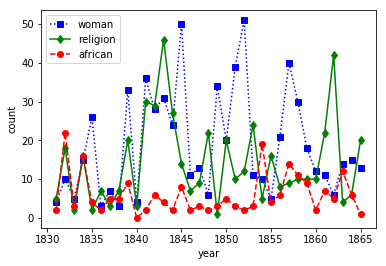

In [114]:
#my graph: 
plt.plot(all_years,X_all_years_50[:,vect_50.vocabulary_['woman']],'bs:')
plt.plot(all_years,X_all_years_50[:,vect_50.vocabulary_['religion']],'gd-')
plt.plot(all_years,X_all_years_50[:,vect_50.vocabulary_['african']],'ro--')
plt.legend(['woman','religion','african'])
plt.ylabel('count')
plt.xlabel('year');

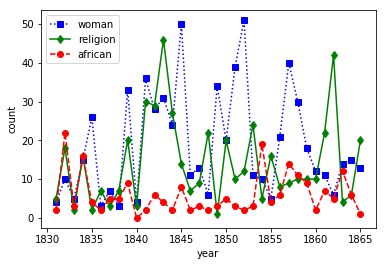

In [252]:
plt.plot(all_years,X_all_years_50[:,vect_50.vocabulary_['woman']],'bs:')
plt.plot(all_years,X_all_years_50[:,vect_50.vocabulary_['religion']],'gd-')
plt.plot(all_years,X_all_years_50[:,vect_50.vocabulary_['african']],'ro--')
plt.legend(['woman','religion','african'])
plt.ylabel('count')
plt.xlabel('year');

# Year-to-year similarity

Next, let's look for transitions in the data.

For each pair of years, we can compute the cosine similarity,

$\cos(x,y) = \frac{x \cdot y}{||x|| \times ||y||}$,

with $\cos(x,y) \in [0,1]$

In [115]:
corr = np.zeros(X_all_years.shape[0]-1)
for i,X_year in enumerate(X_all_years[:-1,]):
    corr[i] = X_year.dot(X_all_years[i+1,]) / ((np.linalg.norm(X_year)) * (np.linalg.norm(X_all_years[i+1,])))

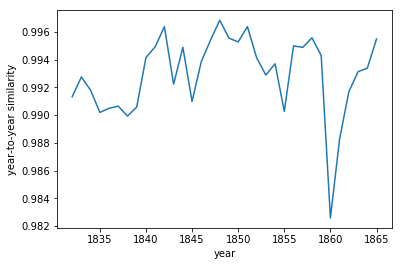

In [116]:
plt.plot(all_years[1:],corr)
plt.xlabel('year')
plt.ylabel('year-to-year similarity');

**Your turn:** Compute the cosine similarity of each year with the sum over the previous three years (when applicable)

In [ ]:
#For every year, I need a sum of the counts for words from previous three years. 

# Possible next steps

- Compare the Liberator with other newspaper (ask for this data)
- Apply tf-idf before computing cosine similarity
- Compute topics, track their frequency over time
- Identify named entities, track their frequency over time